In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [5]:
initial_data = yf.download('GOOG', start='2020-10-01', end='2021-10-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
initial_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,1466.800049,1489.750000,1459.880005,1469.599976,1469.599976,1701600
2020-10-01,1484.270020,1499.040039,1479.209961,1490.089966,1490.089966,1779500
2020-10-02,1462.030029,1483.199951,1450.920044,1458.420044,1458.420044,1284100
2020-10-05,1466.209961,1488.209961,1464.270020,1486.020020,1486.020020,1113300
2020-10-06,1475.579956,1486.760010,1448.589966,1453.439941,1453.439941,1245400


In [43]:
initial_data['Close'].head()

Date
2020-09-30    1469.599976
2020-10-01    1490.089966
2020-10-02    1458.420044
2020-10-05    1486.020020
2020-10-06    1453.439941
Name: Close, dtype: float64

In [45]:
data =  initial_data['Close']
data.info()

AttributeError: 'Series' object has no attribute 'info'

In [13]:
data.head()

Date
2020-09-30    1469.599976
2020-10-01    1490.089966
2020-10-02    1458.420044
2020-10-05    1486.020020
2020-10-06    1453.439941
Name: Adj Close, dtype: float64

In [14]:
data.tail()

Date
2021-09-24    2852.659912
2021-09-27    2830.020020
2021-09-28    2723.679932
2021-09-29    2690.419922
2021-09-30    2665.310059
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

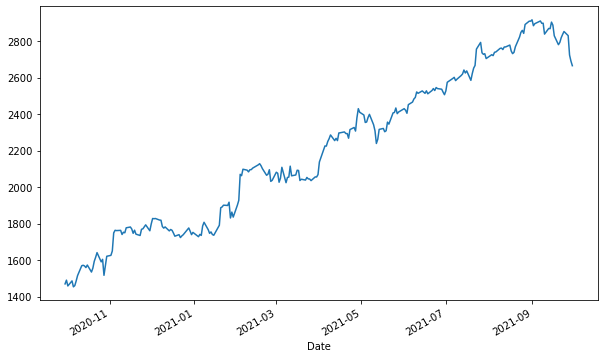

In [16]:
data.plot(figsize=(10, 6), subplots=True)

In [17]:
data.describe().round(2)

count     253.00
mean     2202.11
std       424.37
min      1453.44
25%      1781.38
50%      2137.75
75%      2545.64
max      2916.84
Name: Adj Close, dtype: float64

In [18]:
data.diff().head()


Date
2020-09-30          NaN
2020-10-01    20.489990
2020-10-02   -31.669922
2020-10-05    27.599976
2020-10-06   -32.580078
Name: Adj Close, dtype: float64

In [19]:
data.diff().describe().round(2)


count    252.00
mean       4.74
std       31.96
min     -106.34
25%      -11.53
50%        5.66
75%       20.63
max      142.56
Name: Adj Close, dtype: float64

In [20]:
data.pct_change().round(4).head()


Date
2020-09-30       NaN
2020-10-01    0.0139
2020-10-02   -0.0213
2020-10-05    0.0189
2020-10-06   -0.0219
Name: Adj Close, dtype: float64

In [21]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

AttributeError: 'float' object has no attribute 'plot'

In [22]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-09-30       NaN
2020-10-01    0.0138
2020-10-02   -0.0215
2020-10-05    0.0187
2020-10-06   -0.0222
Name: Adj Close, dtype: float64

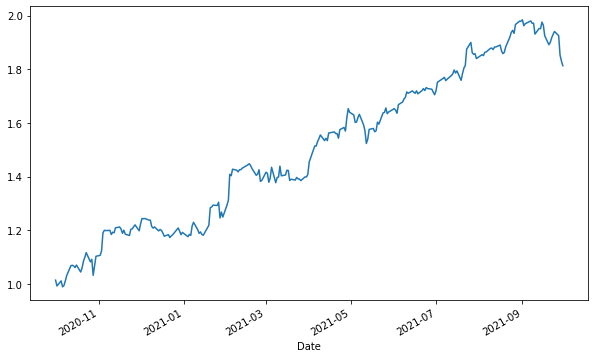

In [23]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));


In [24]:
data.resample('1w', label='right').last().head()


Date
2020-10-04    1458.420044
2020-10-11    1515.219971
2020-10-18    1573.010010
2020-10-25    1641.000000
2020-11-01    1621.010010
Freq: W-SUN, Name: Adj Close, dtype: float64

In [25]:
data.resample('1m', label='right').last().head()

Date
2020-09-30    1469.599976
2020-10-31    1621.010010
2020-11-30    1760.739990
2020-12-31    1751.880005
2021-01-31    1835.739990
Freq: M, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

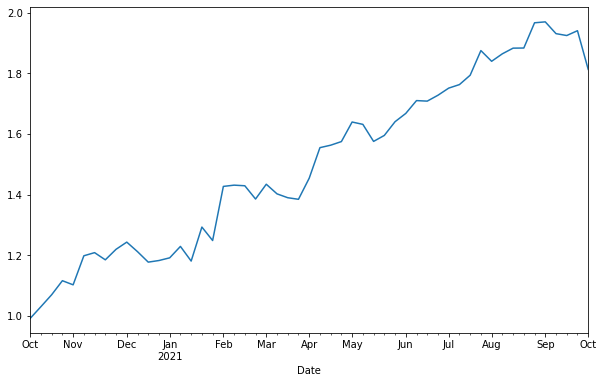

In [26]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

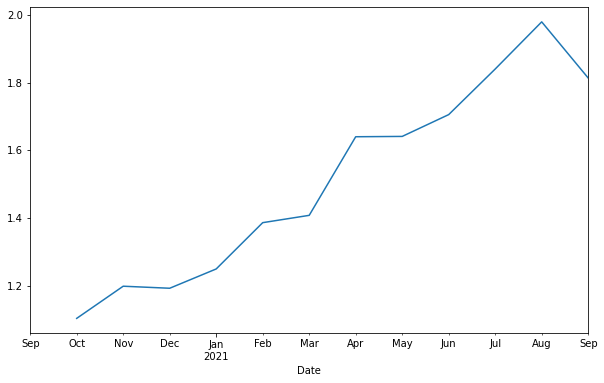

In [27]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [28]:
sym = 'GOOG'
GOOG_data = pd.DataFrame(data[sym]).dropna()
GOOG_data.tail()

KeyError: 'GOOG'

In [29]:
window = 10
GOOG_data['min'] = data[sym].rolling(window=window).min()
GOOG_data['mean'] = data[sym].rolling(window=window).mean()
GOOG_data['std'] = data[sym].rolling(window=window).std()
GOOG_data['median'] = data[sym].rolling(window=window).median()
GOOG_data['max'] = data[sym].rolling(window=window).max()
GOOG_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
GOOG_data.dropna().head()

KeyError: 'GOOG'

In [30]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);


NameError: name 'AAPL_data' is not defined

In [31]:
GOOG_data['SMA1'] = data[sym].rolling(window=20).mean()
GOOG_data['SMA2'] = data[sym].rolling(window=60).mean()
GOOG_data[[sym, 'SMA1', 'SMA2']].tail()

KeyError: 'GOOG'

In [32]:
GOOG_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

NameError: name 'GOOG_data' is not defined

In [33]:
GOOG_data.dropna(inplace=True)
GOOG_data['positions'] = np.where(GOOG_data['SMA1'] > GOOG_data['SMA2'],1,-1)
ax = GOOG_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))


NameError: name 'GOOG_data' is not defined

In [34]:
Corr_data = data[['GOOG', '^VIX']].dropna()
Corr_data.tail()


KeyError: "None of [Index(['GOOG', '^VIX'], dtype='object', name='Date')] are in the [index]"

In [35]:
Corr_data.plot(subplots=True, figsize=(10, 6))


NameError: name 'Corr_data' is not defined

In [36]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));


NameError: name 'Corr_data' is not defined

In [37]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()


NameError: name 'Corr_data' is not defined

In [38]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))


NameError: name 'sprets' is not defined

In [39]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

NameError: name 'sprets' is not defined

In [40]:
reg = np.polyfit(sprets['GOOG'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='GOOG', y='^VIX', figsize=(10, 6))
ax.plot(sprets['GOOG'], np.polyval(reg, sprets['GOOG']), 'r', lw=2);


NameError: name 'sprets' is not defined

In [41]:
sprets.corr()

NameError: name 'sprets' is not defined

In [42]:
ax = sprets['GOOG'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');


NameError: name 'sprets' is not defined